MNIST
Aproximate error rate BEFORE training is 90.7 %
Aproximate error rate during iteration 0 is 80.8 %
Aproximate error rate during iteration 100 is 6.6 %
Aproximate error rate during iteration 200 is 4.6 %
Aproximate error rate during iteration 300 is 3.4 %
Aproximate error rate during iteration 400 is 3.4 %
Aproximate error rate during iteration 500 is 2.6 %
Aproximate error rate during iteration 600 is 3.7 %
Aproximate error rate during iteration 700 is 2.6 %
Aproximate error rate during iteration 800 is 2.2 %
Aproximate error rate during iteration 900 is 3.3 %

Total training time: 90.77 seconds

Final aproximate training error is 2.4 %

Final test error is 2.79 %

In [114]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [115]:
eval_data_mnist = np.load("tmp/MNIST/eval_data_mnist.npy")
Activations1 = np.load("tmp/MNIST/ActivationsMnist_Layer1.npy")
Activations2 = np.load("tmp/MNIST/ActivationsMnist_Layer2.npy")

best1 = np.load("tmp/MNIST/BestImagesMnist_Layer1.npy")
best2 = np.load("tmp/MNIST/BestImagesMnist_Layer2.npy")

filters1 = np.load("tmp/MNIST/RandomFiltersIndexMnist_Layer1.npy")
filters2 = np.load("tmp/MNIST/RandomFiltersIndexMnist_Layer2.npy")

weight1 = np.load("tmp/MNIST/WeightMnist_1.npy")
weight2 = np.load("tmp/MNIST/WeightMnist_2.npy")


print("Data:", eval_data_mnist.shape)
print("\n")
print("First layer activations", Activations1.shape)
print("Filter indexes:", filters1)
print("Weight 1 shape:", weight1.shape)
#print(best1)
print("\n")
print("Second layer activations",Activations2.shape)
#print(best2)
print("Filter indexes:", filters2)
print("Weight 2 shape:", weight2.shape)

Data: (100, 784)


First layer activations (9, 10, 28, 28, 1)
Filter indexes: [21 12 14 25  3 15 11  4 13]
Weight 1 shape: (5, 5, 1, 32)


Second layer activations (9, 10, 28, 28, 1)
Filter indexes: [18  1 11 52 16 23 54  8 37]
Weight 2 shape: (5, 5, 32, 64)


# Best Nodes

In [116]:
Norm1 = np.linalg.norm(Activations1, axis = (3, 4))
Norm1 = np.linalg.norm(Norm1, axis = (1, 2))

In [117]:
print("Activations by Node:")
print(Norm1)

Activations by Node:
[ 1.72261148  2.9678966   2.4474615   1.30812551  2.12750634  0.77773865
  1.70199648  4.68751222  1.96319924]


In [118]:
print(np.argsort(Norm1))

[5 3 6 0 8 4 2 1 7]


In [119]:
best_nodes = np.where(24 <= np.argsort(Norm1))[0]

In [120]:
print("Best Nodes by Activation:", best_nodes)

Best Nodes by Activation: []


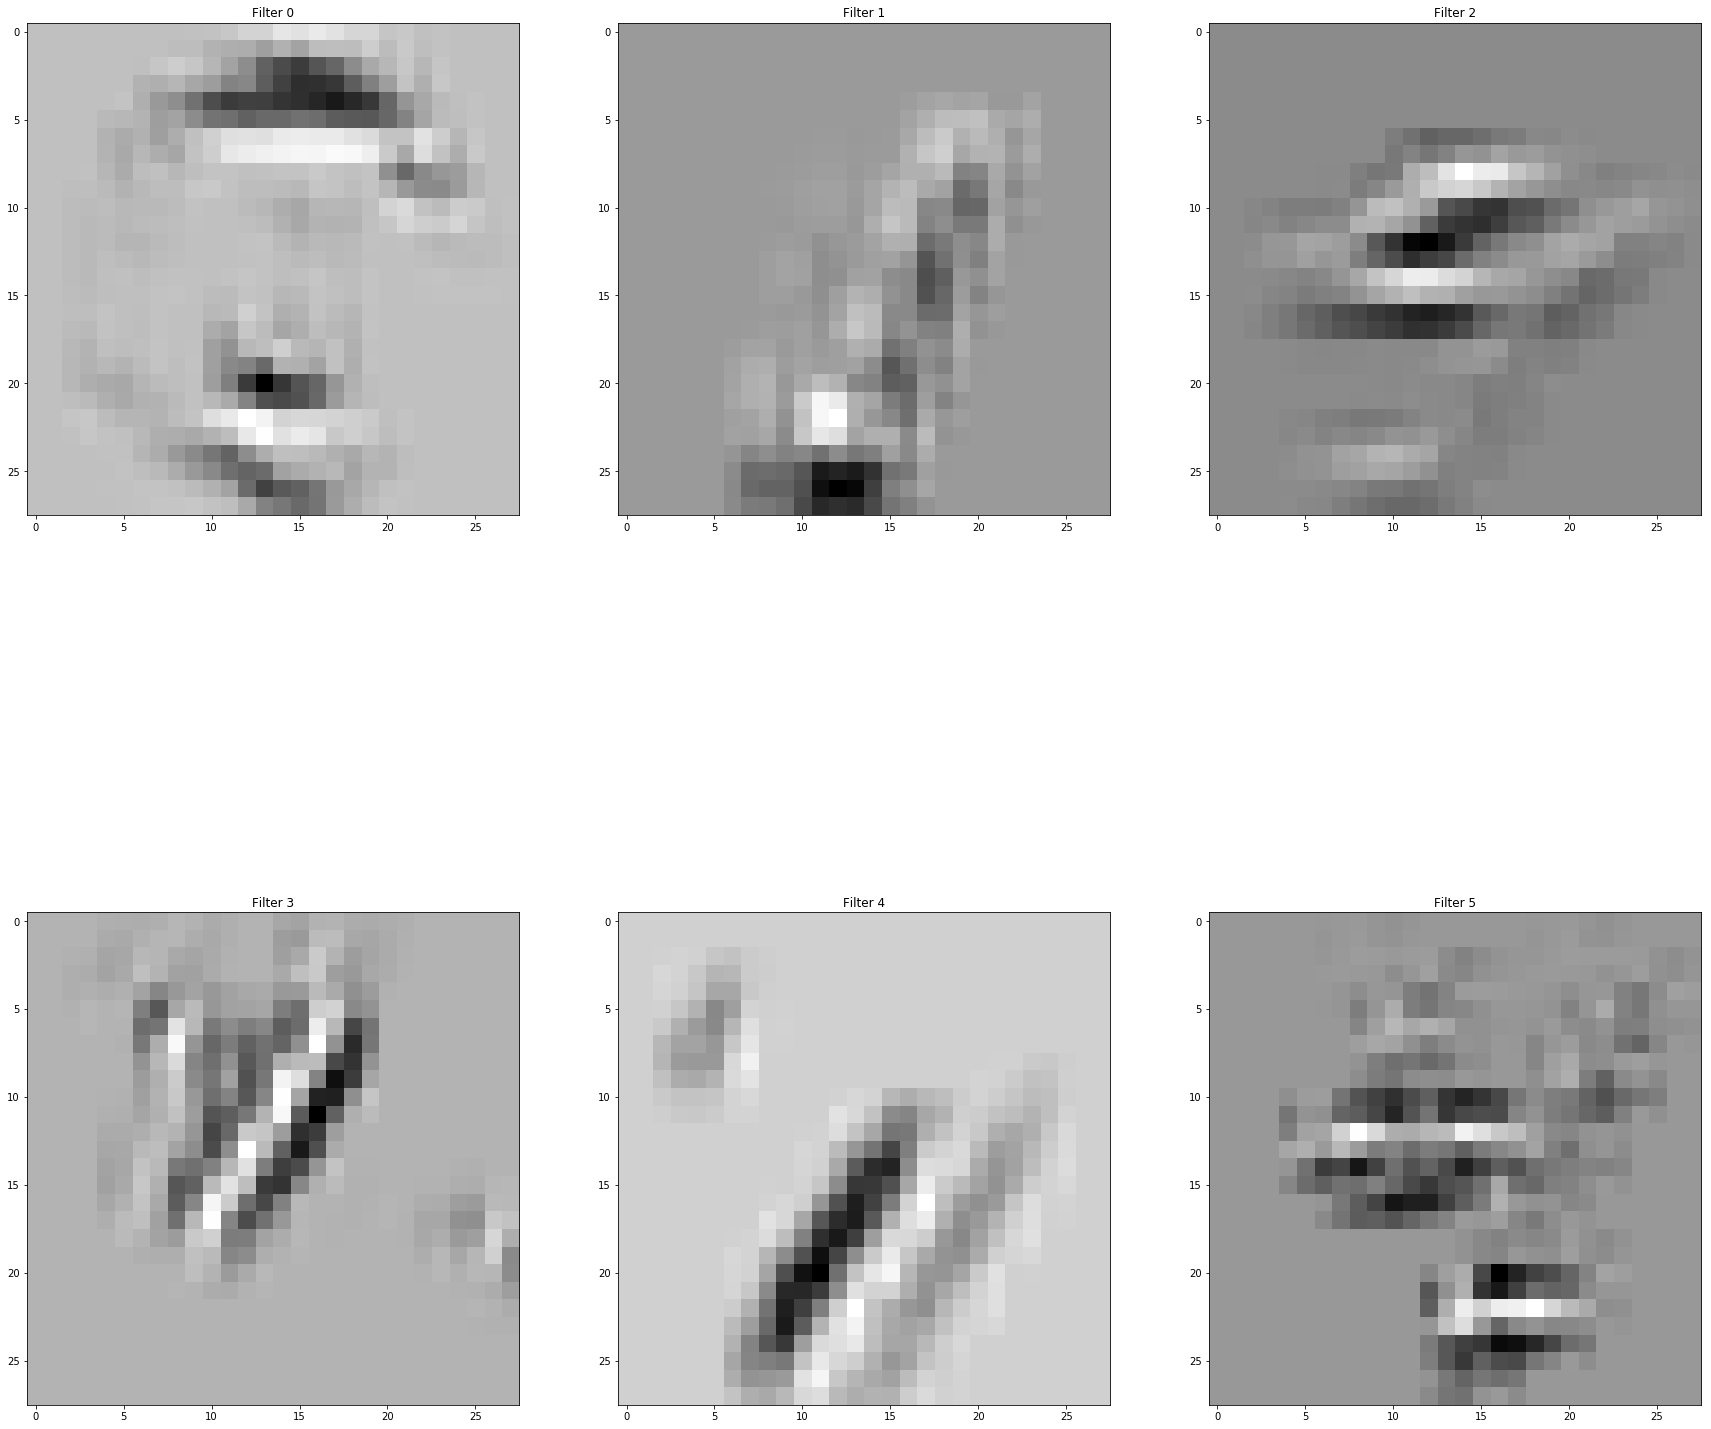

In [128]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(6):
    plt.subplot(2, 3, j)
    plt.title('Filter ' + str(i))
    plt.imshow(Activations1[i, 0, :, :, 0], interpolation="nearest", cmap = "gray")
    j = j + 1
    
plt.show()

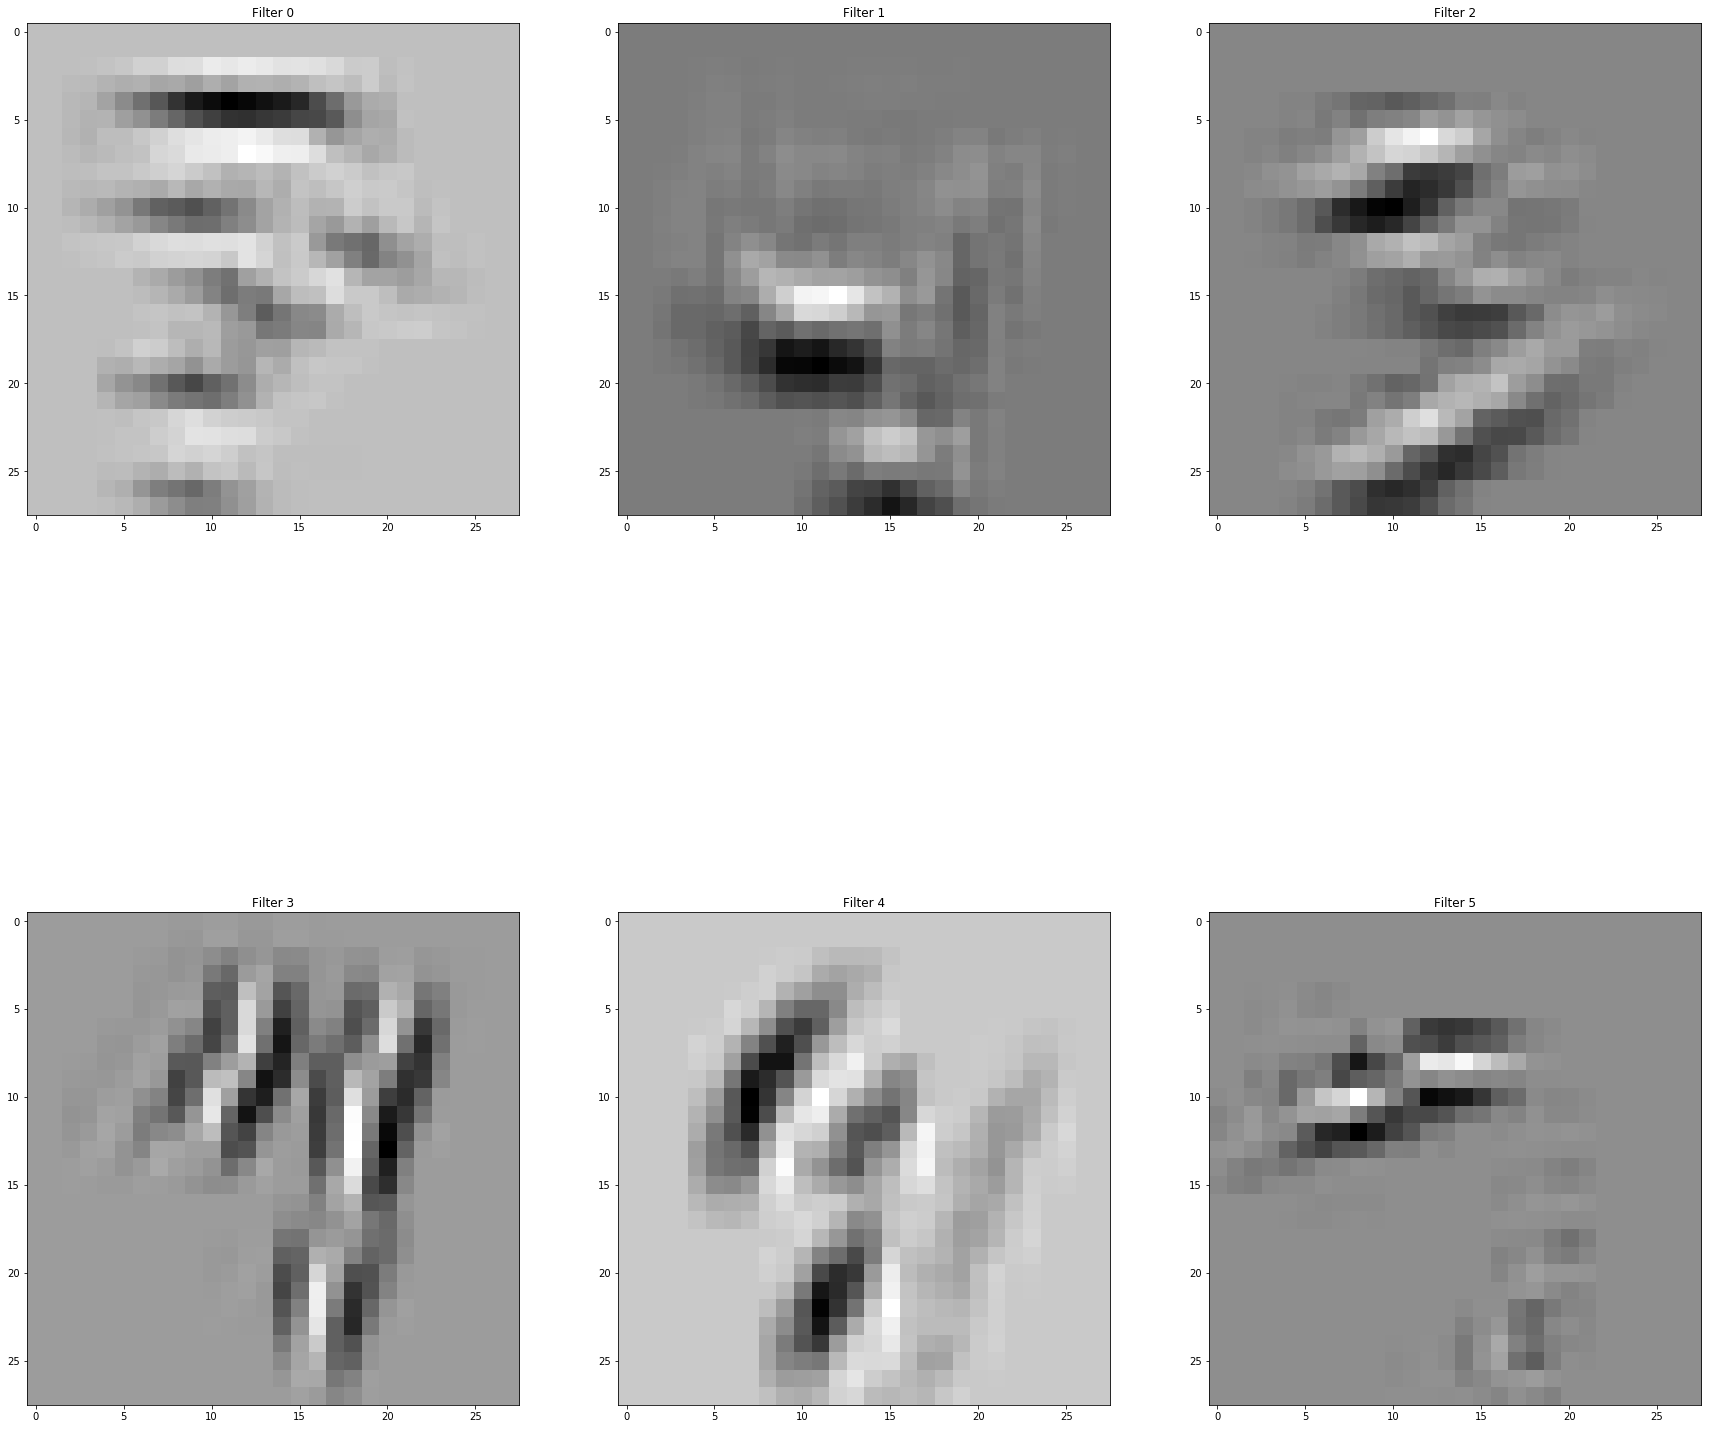

In [130]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(6):
    plt.subplot(2, 3, j)
    plt.title('Filter ' + str(i))
    plt.imshow(Activations1[i, 3, :, :, 0], interpolation="nearest", cmap = "gray")
    j = j + 1
    
plt.show()

# Image action by random node:

In [131]:
subset = random.sample(range(Activations1.shape[1]), 2)
print("Selected nodes:", subset)

Selected nodes: [2, 0]


[  9.  12.  25.  30.  44.  48.  51.  68.  75.  92.]


D:\Anaconda64\envs\AdvML\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


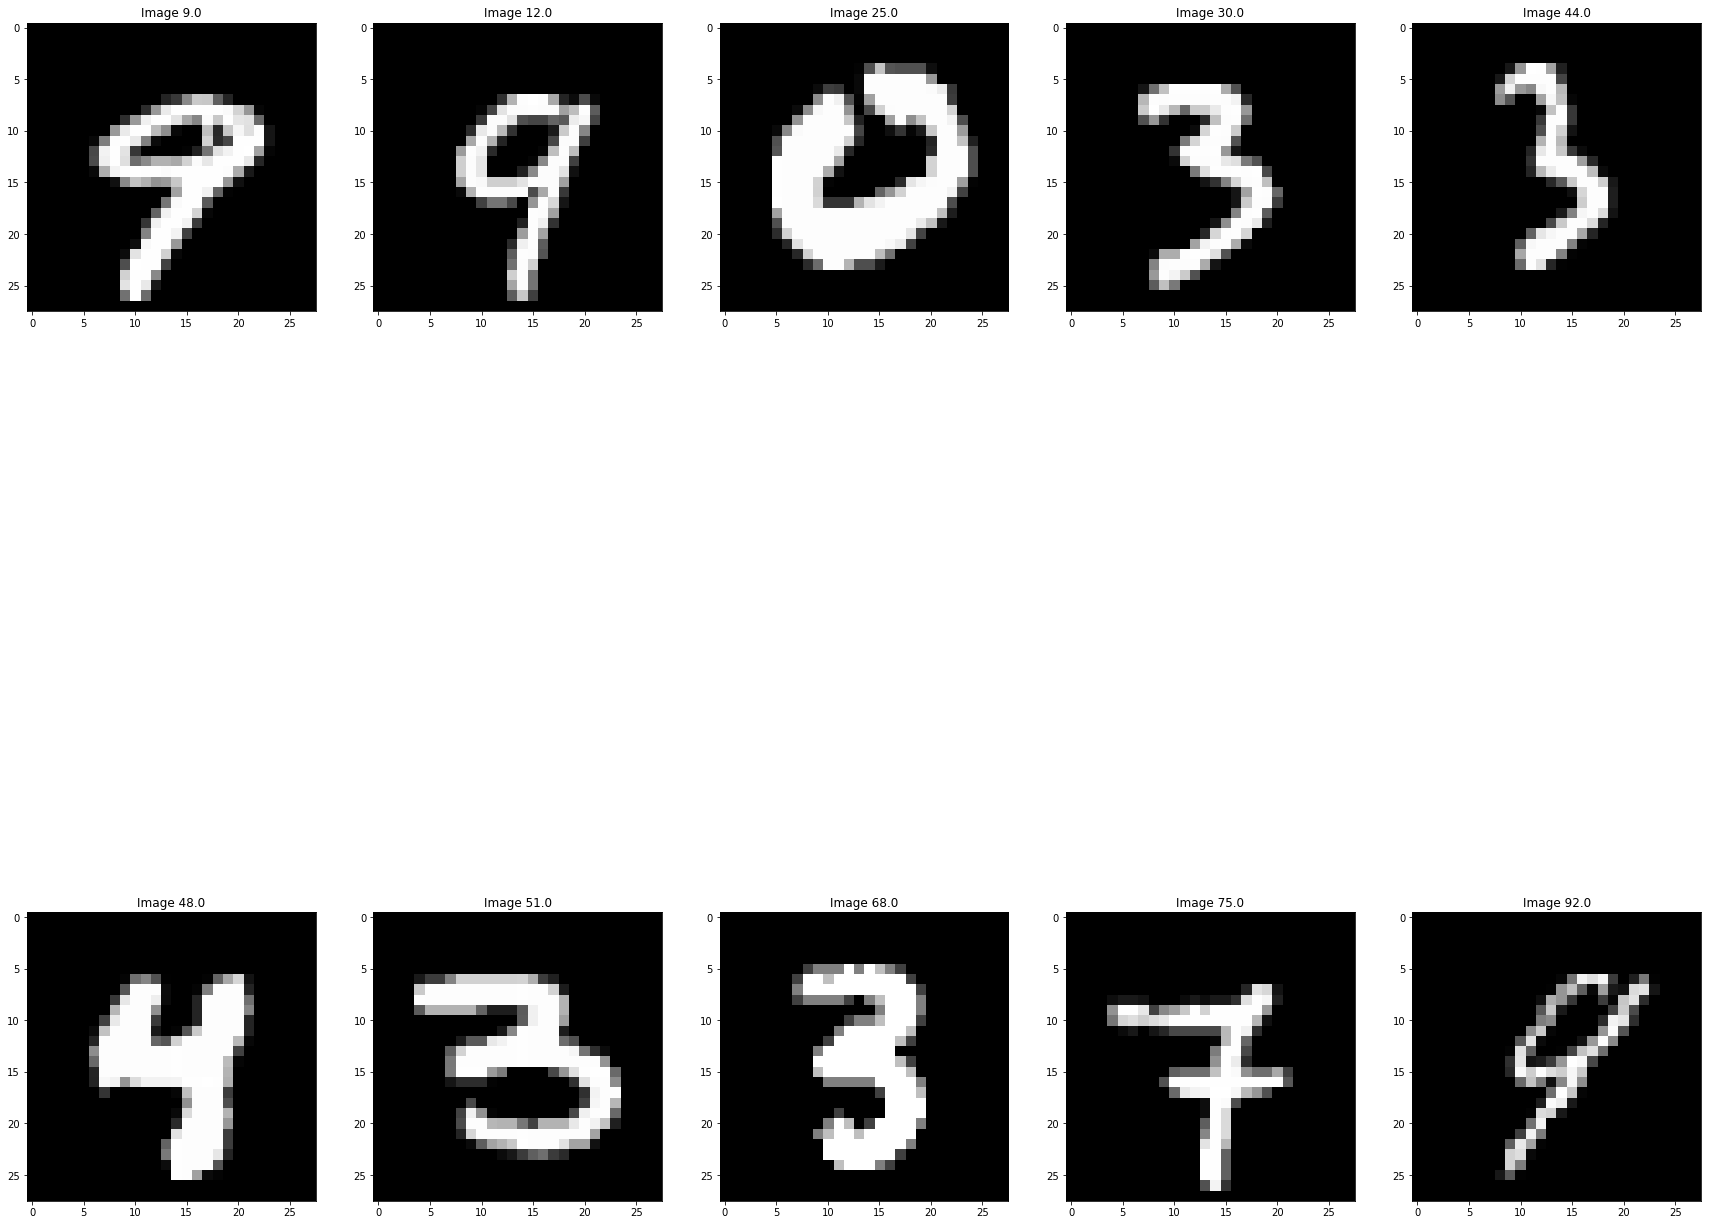

In [137]:
plt.figure(1, figsize=(30, 30))
j = 1
best_a = best1[subset[0],]

print(best_a)

for i in best_a:
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(eval_data_mnist[int(i), :].reshape(28,28), interpolation="nearest", cmap = "gray")
    j = j + 1

plt.show()

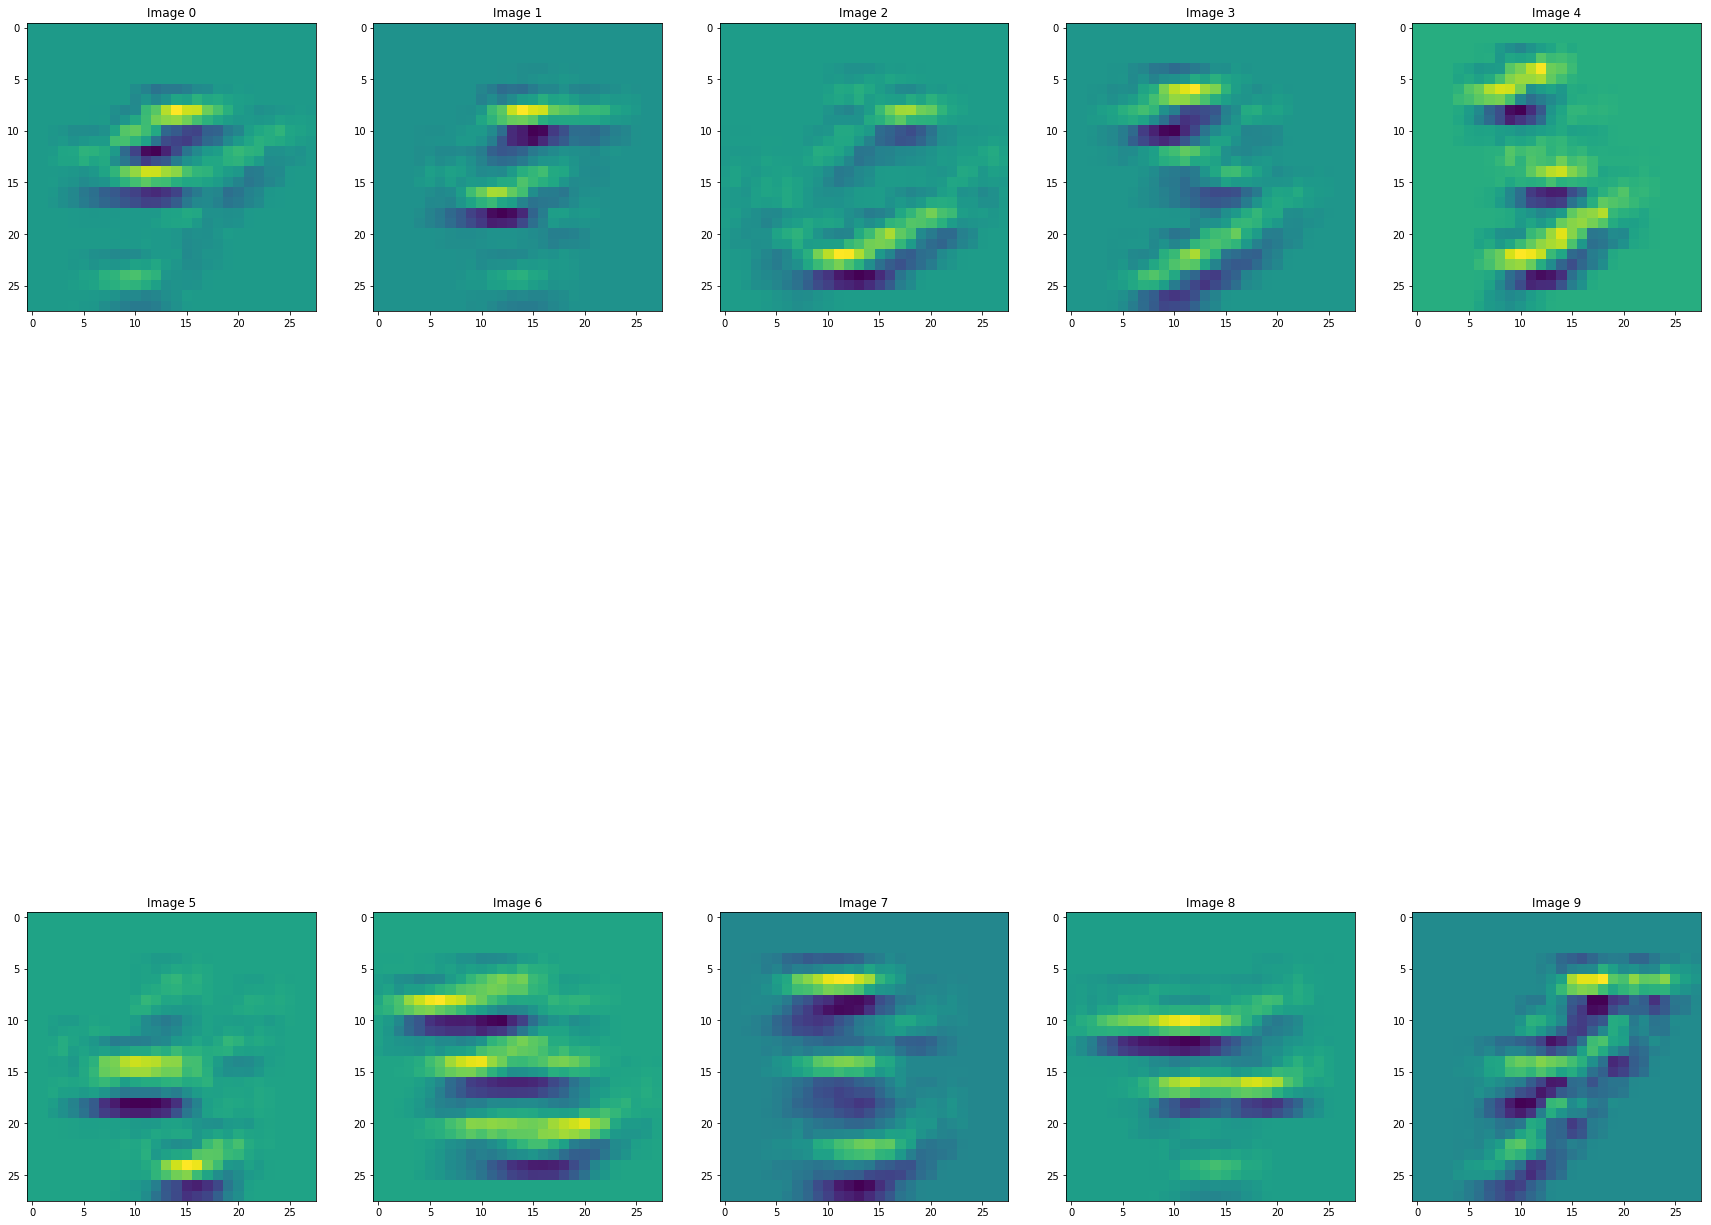

In [138]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(10):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(Activations1[subset[0], i, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()

[ 13.  14.  18.  30.  44.  49.  63.  70.  73.  87.]


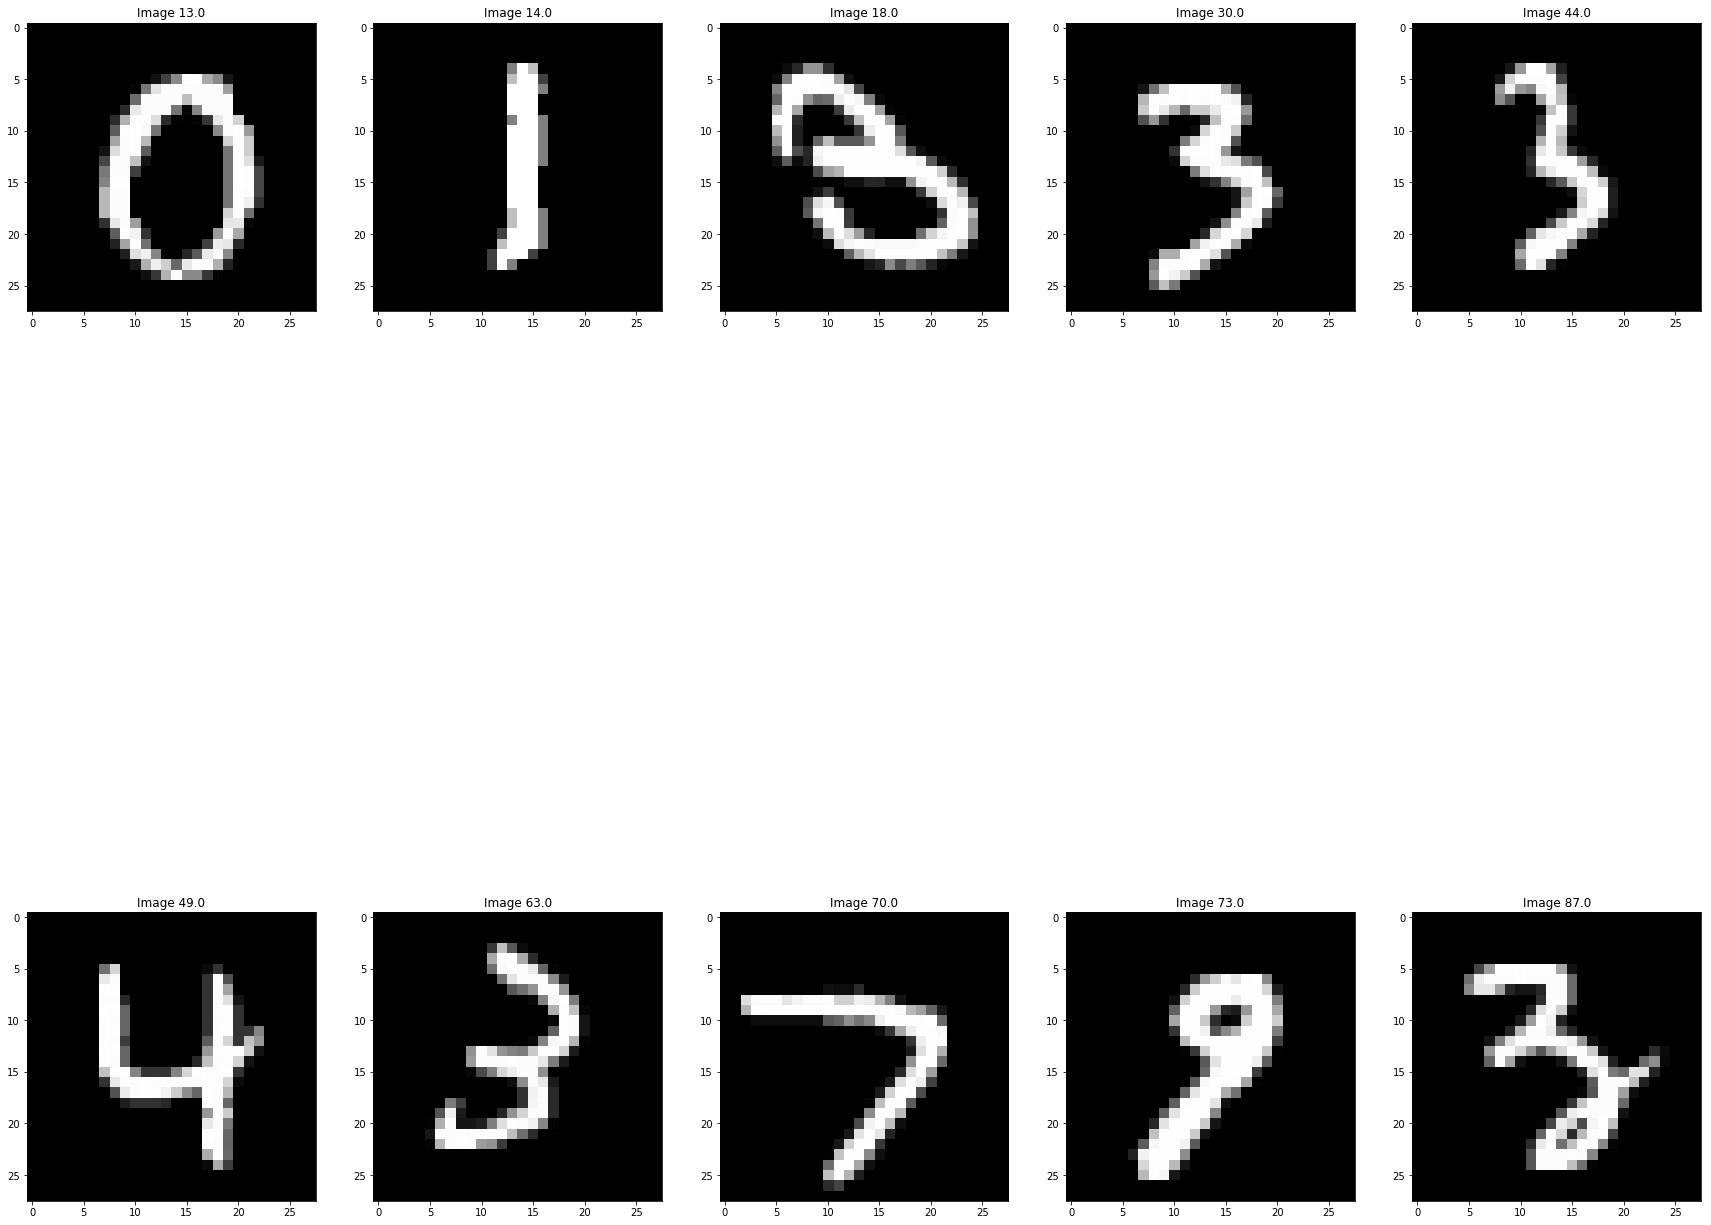

In [140]:
plt.figure(1, figsize=(30, 30))
j = 1
best_a = best1[subset[1],]

print(best_a)

for i in best_a:
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(eval_data_mnist[int(i), :].reshape(28,28), interpolation="nearest", cmap = "gray")
    j = j + 1

plt.show()

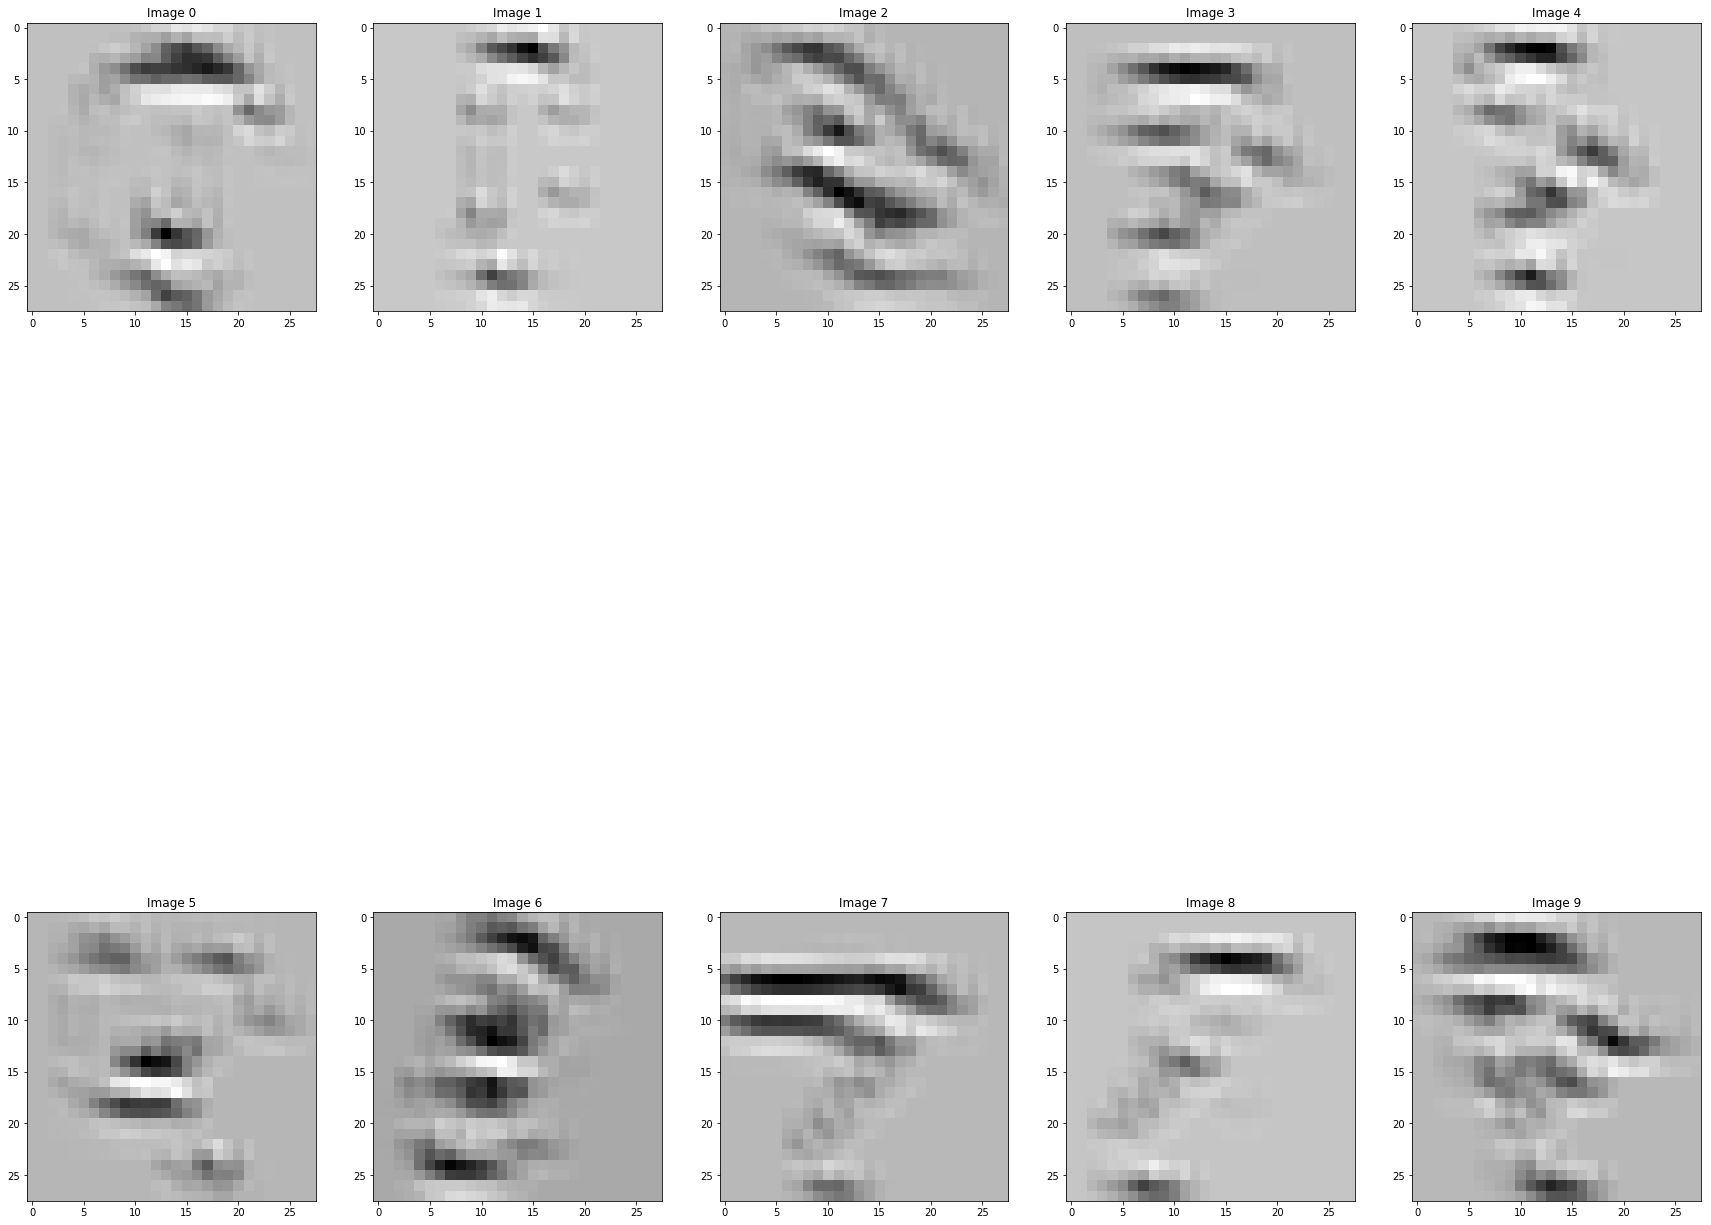

In [142]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(10):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(Activations1[subset[1], i, :, :, 0], interpolation="nearest", cmap = "gray")
    j = j + 1
    
plt.show()

# Looking at Weights

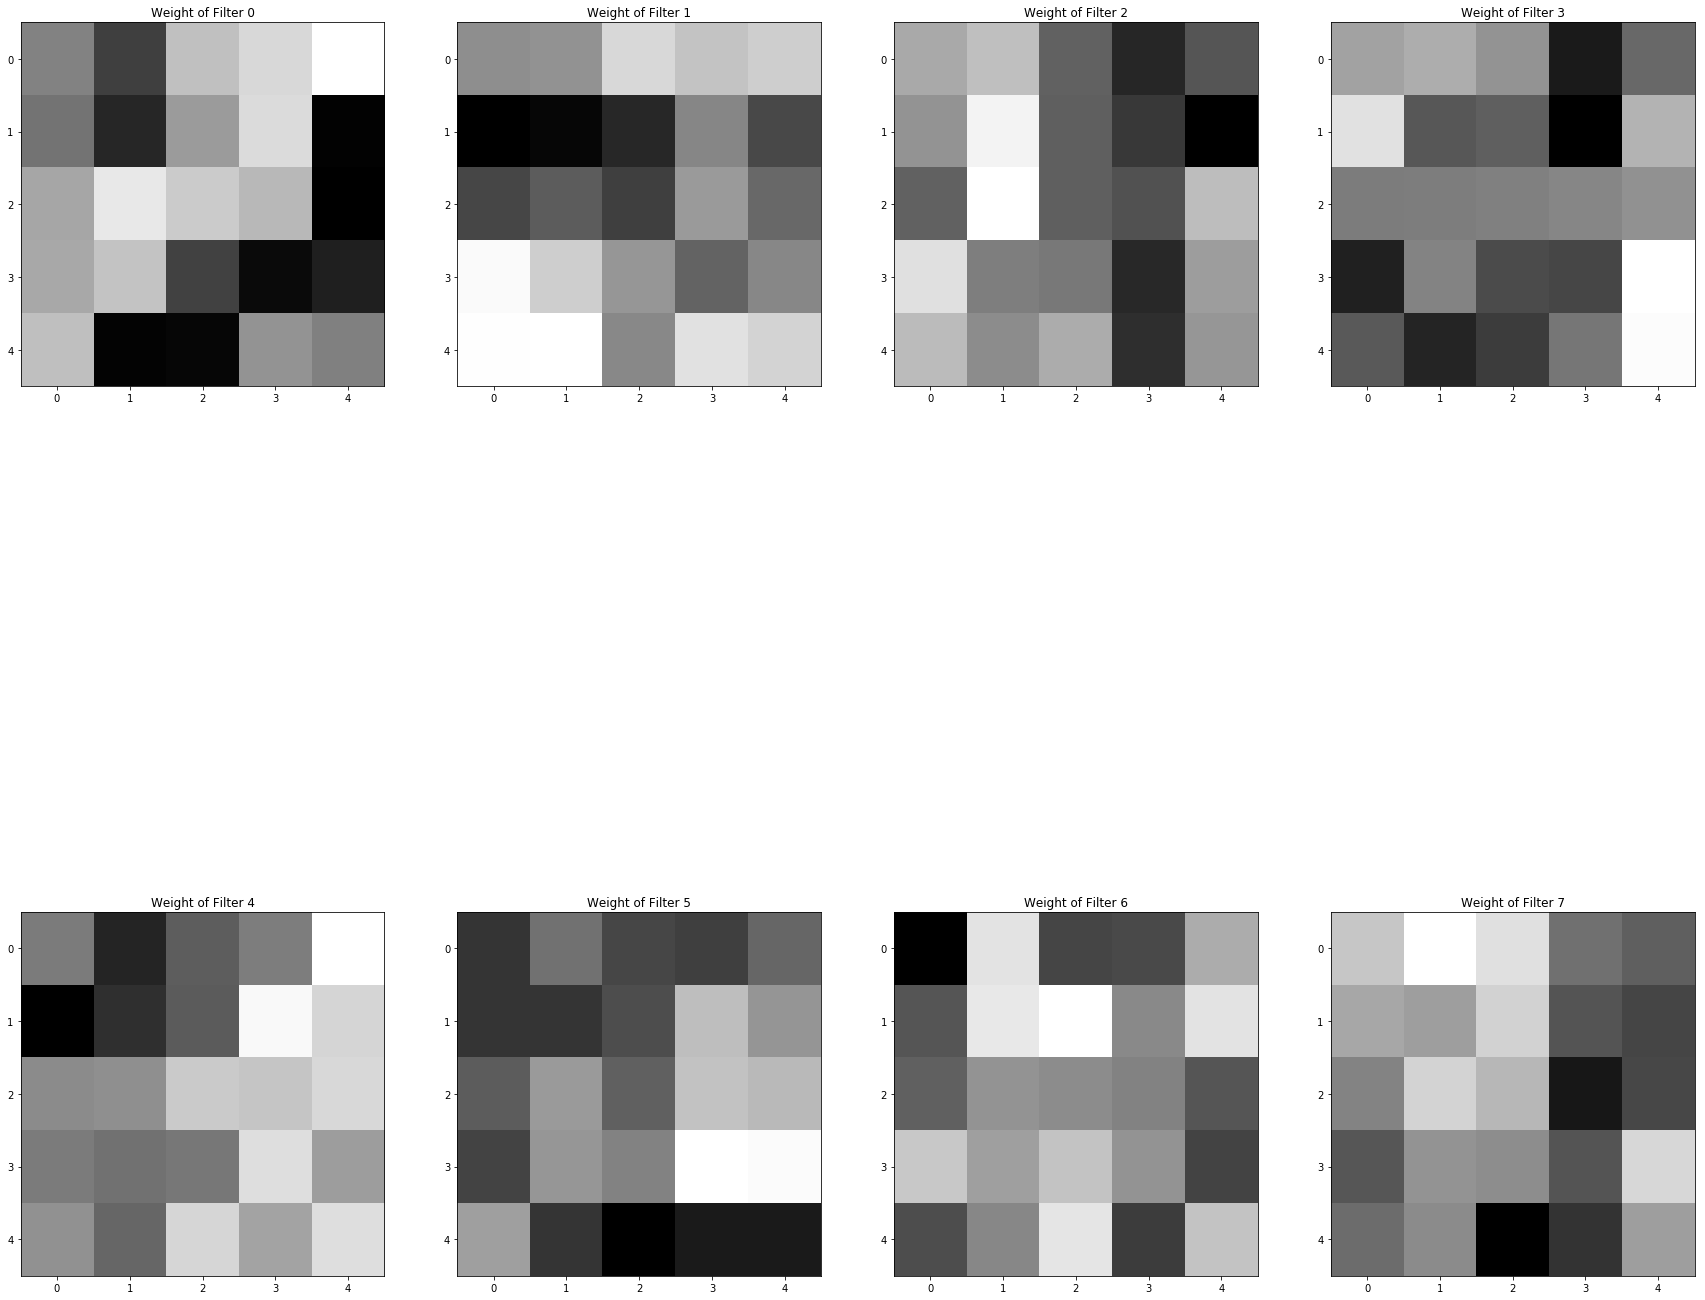

In [145]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(8):
    plt.subplot(2, 4, j)
    plt.title('Weight of Filter ' + str(i))
    plt.imshow(weight1[:, :, 0, i], interpolation="nearest", cmap="gray")
    j = j + 1
    
plt.show()